<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/bilstm_attention_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Concatenate, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 5

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 54s 116ms/step - loss: 0.6569 - accuracy: 0.5778 - val_loss: 0.4359 - val_accuracy: 0.8260
Epoch 2/100
176/176 [==============================] - 20s 112ms/step - loss: 0.3773 - accuracy: 0.8541 - val_loss: 0.3078 - val_accuracy: 0.8724
Epoch 3/100
176/176 [==============================] - 20s 115ms/step - loss: 0.2545 - accuracy: 0.9015 - val_loss: 0.2950 - val_accuracy: 0.8768
Epoch 4/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2002 - accuracy: 0.9286 - val_loss: 0.2953 - val_accuracy: 0.8792
Epoch 5/100
176/176 [==============================] - 20s 115ms/step - loss: 0.1676 - accuracy: 0.9419 - val_loss: 0.3128 - val_accuracy: 0.8776
Epoch 6/100
176/176 [==============================] - 20s 114ms/step - loss: 0.1509 - accuracy: 0.9509 - val_loss: 0.3260 - val_accuracy: 0.8804
Epoch 7/100
176/176 [==============================] - 20s 114ms/step - loss: 0.1313 - accuracy: 0.9577 - v

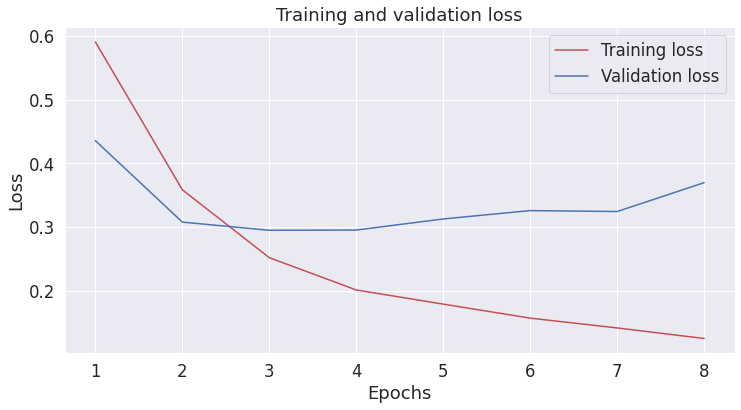

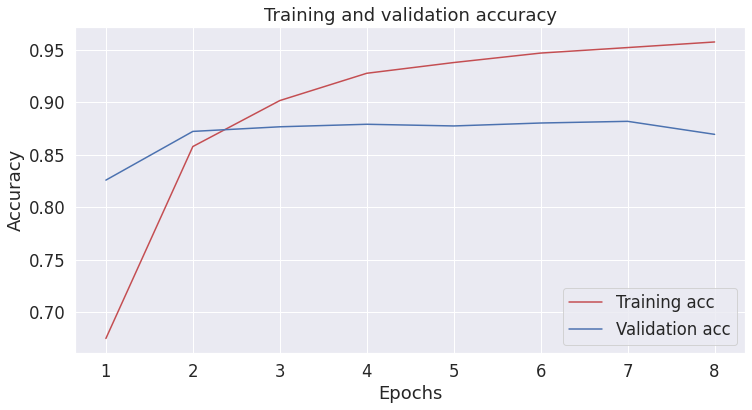

              precision    recall  f1-score   support

           0      0.916     0.838     0.875     12500
           1      0.850     0.923     0.885     12500

    accuracy                          0.880     25000
   macro avg      0.883     0.880     0.880     25000
weighted avg      0.883     0.880     0.880     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 24s 119ms/step - loss: 0.6855 - accuracy: 0.5468 - val_loss: 0.6541 - val_accuracy: 0.7632
Epoch 2/100
176/176 [==============================] - 20s 116ms/step - loss: 0.6567 - accuracy: 0.6397 - val_loss: 0.5924 - val_accuracy: 0.7448
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.5029 - accuracy: 0.7715 - val_loss: 0.3235 - val_accuracy: 0.8632
Epoch 4/100
176/176 [==============================] - 20s 115ms/step - loss: 0.2939 - accuracy: 0.8897 - val_loss: 0.3034 - val_accuracy: 0.8800
Epoch 5/100
176/176 [==============================] - 20s 115ms/step -

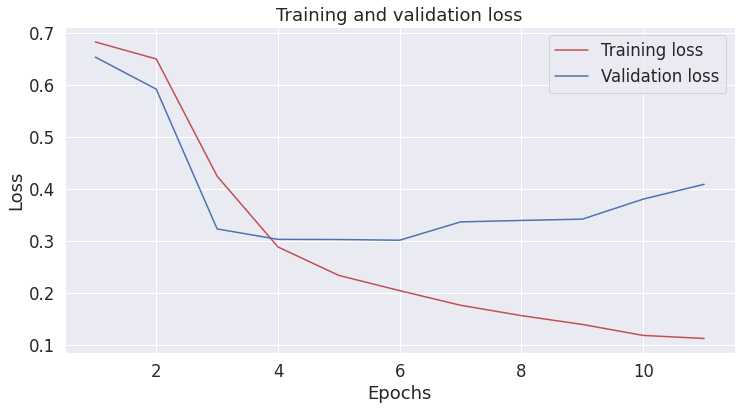

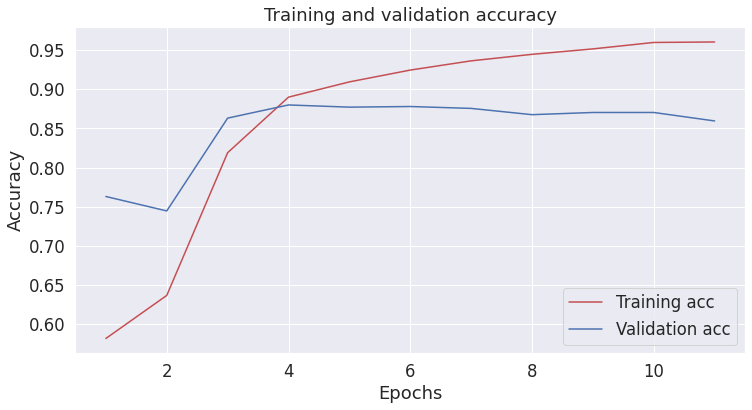

              precision    recall  f1-score   support

           0      0.865     0.880     0.873     12500
           1      0.878     0.863     0.871     12500

    accuracy                          0.872     25000
   macro avg      0.872     0.872     0.872     25000
weighted avg      0.872     0.872     0.872     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 24s 119ms/step - loss: 0.6764 - accuracy: 0.5444 - val_loss: 0.3314 - val_accuracy: 0.8564
Epoch 2/100
176/176 [==============================] - 20s 116ms/step - loss: 0.3198 - accuracy: 0.8709 - val_loss: 0.2759 - val_accuracy: 0.8888
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.2289 - accuracy: 0.9175 - val_loss: 0.2757 - val_accuracy: 0.8912
Epoch 4/100
176/176 [==============================] - 20s 116ms/step - loss: 0.1913 - accuracy: 0.9312 - val_loss: 0.2936 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 21s 117ms/step -

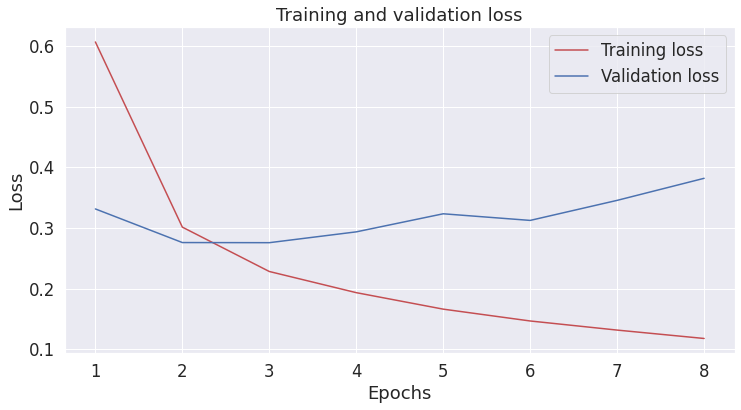

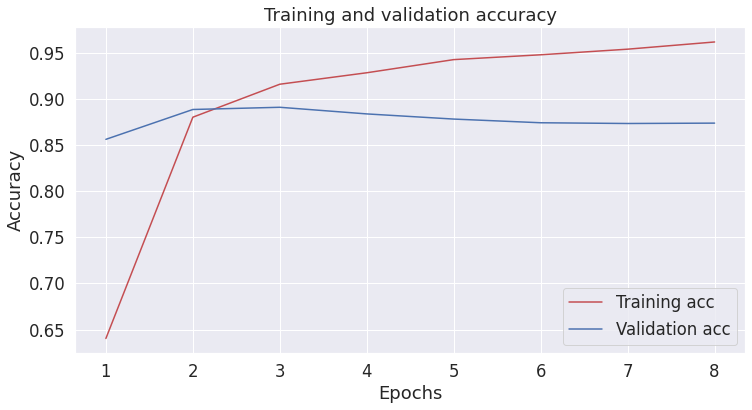

              precision    recall  f1-score   support

           0      0.887     0.882     0.885     12500
           1      0.883     0.888     0.885     12500

    accuracy                          0.885     25000
   macro avg      0.885     0.885     0.885     25000
weighted avg      0.885     0.885     0.885     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 25s 121ms/step - loss: 0.6666 - accuracy: 0.5649 - val_loss: 0.5963 - val_accuracy: 0.6848
Epoch 2/100
176/176 [==============================] - 21s 117ms/step - loss: 0.4826 - accuracy: 0.7745 - val_loss: 0.3026 - val_accuracy: 0.8740
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2535 - accuracy: 0.9038 - val_loss: 0.3033 - val_accuracy: 0.8692
Epoch 4/100
176/176 [==============================] - 21s 118ms/step - loss: 0.2302 - accuracy: 0.9110 - val_loss: 0.2968 - val_accuracy: 0.8812
Epoch 5/100
176/176 [==============================] - 21s 117ms/step -

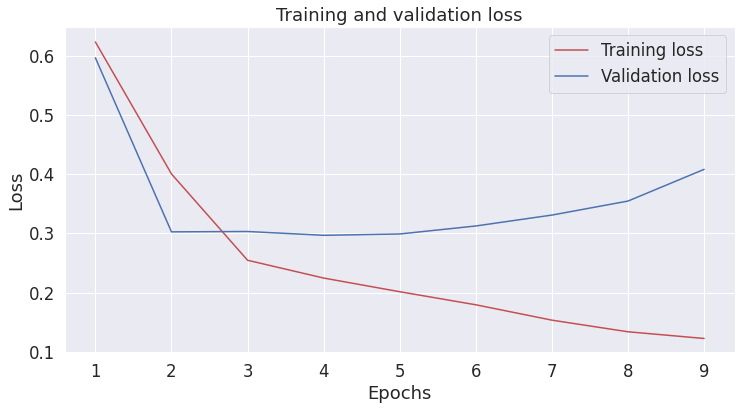

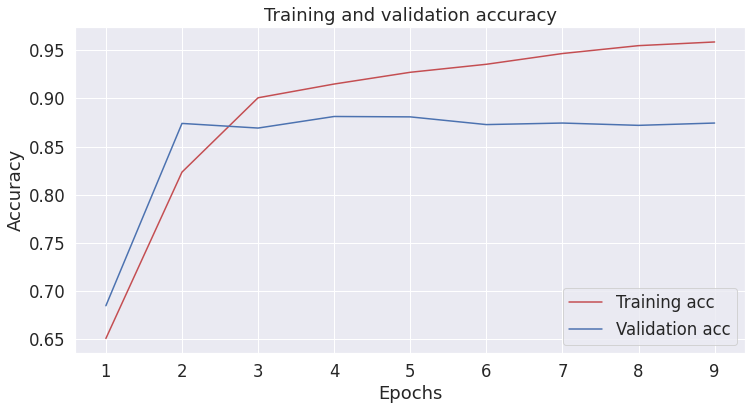

              precision    recall  f1-score   support

           0      0.885     0.870     0.877     12500
           1      0.872     0.887     0.879     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 24s 121ms/step - loss: 0.6688 - accuracy: 0.5513 - val_loss: 0.3288 - val_accuracy: 0.8520
Epoch 2/100
176/176 [==============================] - 21s 118ms/step - loss: 0.2849 - accuracy: 0.8893 - val_loss: 0.2732 - val_accuracy: 0.8888
Epoch 3/100
176/176 [==============================] - 21s 117ms/step - loss: 0.2114 - accuracy: 0.9240 - val_loss: 0.2785 - val_accuracy: 0.8884
Epoch 4/100
176/176 [==============================] - 21s 117ms/step - loss: 0.1792 - accuracy: 0.9378 - val_loss: 0.2948 - val_accuracy: 0.8844
Epoch 5/100
176/176 [==============================] - 21s 117ms/step -

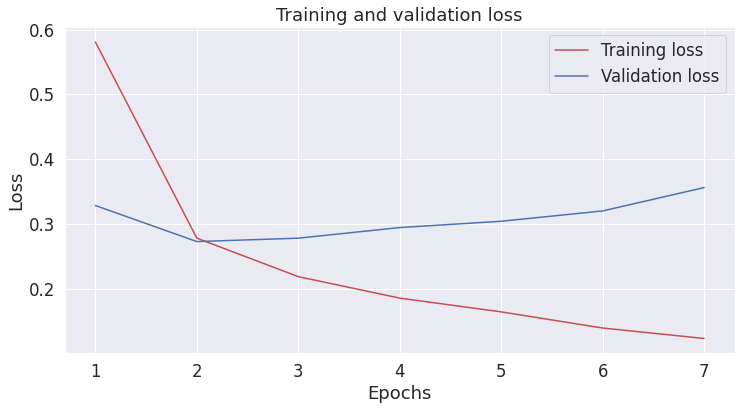

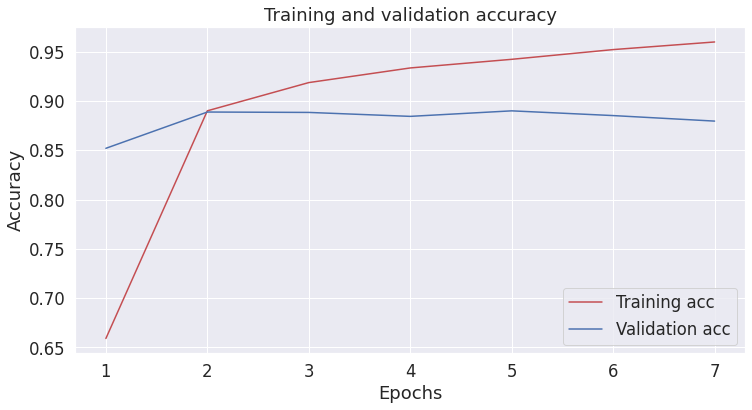

              precision    recall  f1-score   support

           0      0.866     0.910     0.887     12500
           1      0.905     0.859     0.882     12500

    accuracy                          0.885     25000
   macro avg      0.886     0.885     0.885     25000
weighted avg      0.886     0.885     0.885     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 24s 124ms/step - loss: 0.6681 - accuracy: 0.5553 - val_loss: 0.3131 - val_accuracy: 0.8672
Epoch 2/100
176/176 [==============================] - 21s 118ms/step - loss: 0.3003 - accuracy: 0.8818 - val_loss: 0.2718 - val_accuracy: 0.8872
Epoch 3/100
176/176 [==============================] - 21s 119ms/step - loss: 0.2155 - accuracy: 0.9218 - val_loss: 0.2698 - val_accuracy: 0.8916
Epoch 4/100
176/176 [==============================] - 21s 118ms/step - loss: 0.1873 - accuracy: 0.9348 - val_loss: 0.2840 - val_accuracy: 0.8888
Epoch 5/100
176/176 [==============================] - 21s 117ms/step -

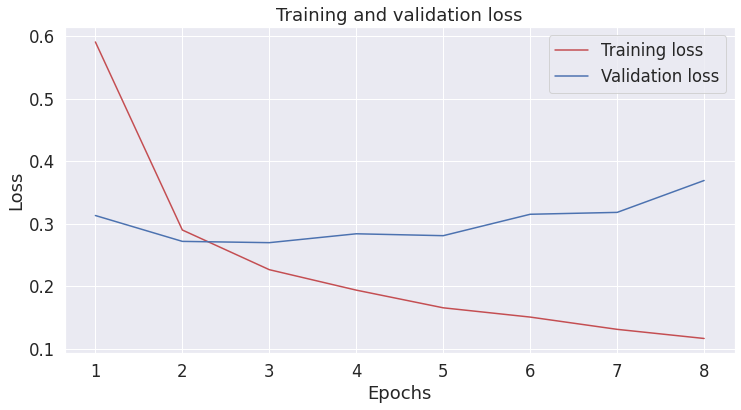

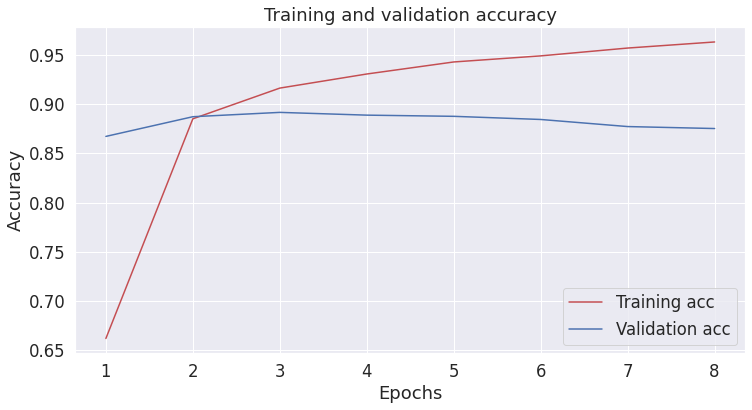

              precision    recall  f1-score   support

           0      0.879     0.892     0.885     12500
           1      0.890     0.877     0.883     12500

    accuracy                          0.884     25000
   macro avg      0.884     0.884     0.884     25000
weighted avg      0.884     0.884     0.884     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 24s 121ms/step - loss: 0.6822 - accuracy: 0.5399 - val_loss: 0.5601 - val_accuracy: 0.7320
Epoch 2/100
176/176 [==============================] - 21s 119ms/step - loss: 0.4745 - accuracy: 0.7823 - val_loss: 0.3161 - val_accuracy: 0.8728
Epoch 3/100
176/176 [==============================] - 21s 118ms/step - loss: 0.3013 - accuracy: 0.8864 - val_loss: 0.3098 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 21s 118ms/step - loss: 0.2224 - accuracy: 0.9171 - val_loss: 0.2805 - val_accuracy: 0.8900
Epoch 5/100
176/176 [==============================] - 21s 118ms/step -

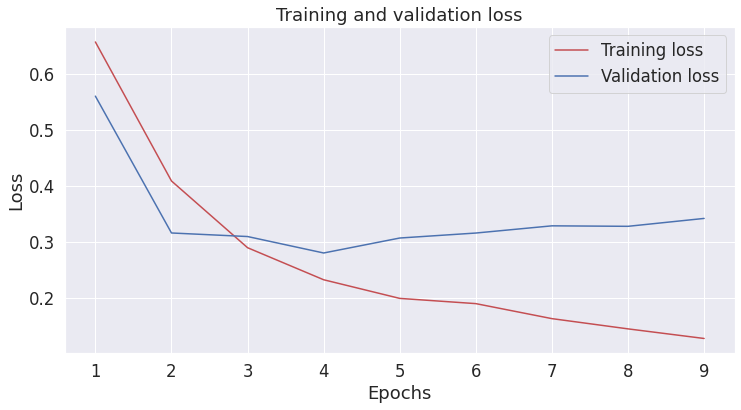

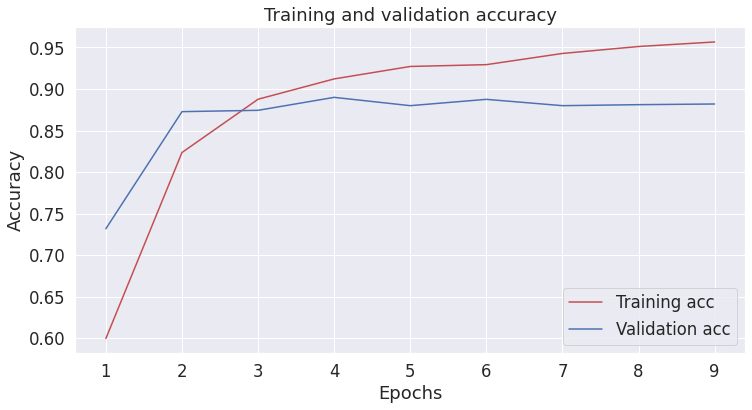

              precision    recall  f1-score   support

           0      0.877     0.882     0.879     12500
           1      0.881     0.876     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 24s 122ms/step - loss: 0.6811 - accuracy: 0.5461 - val_loss: 0.4341 - val_accuracy: 0.8156
Epoch 2/100
176/176 [==============================] - 21s 118ms/step - loss: 0.3887 - accuracy: 0.8309 - val_loss: 0.2988 - val_accuracy: 0.8704
Epoch 3/100
176/176 [==============================] - 21s 118ms/step - loss: 0.2540 - accuracy: 0.9036 - val_loss: 0.3093 - val_accuracy: 0.8664
Epoch 4/100
176/176 [==============================] - 21s 118ms/step - loss: 0.2100 - accuracy: 0.9224 - val_loss: 0.2803 - val_accuracy: 0.8804
Epoch 5/100
176/176 [==============================] - 21s 118ms/step -

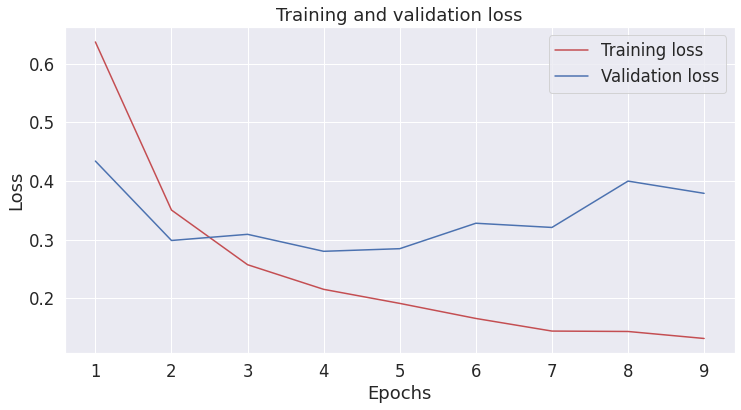

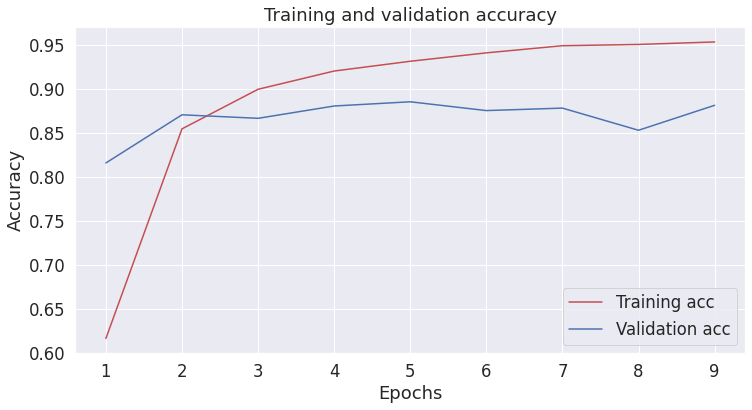

              precision    recall  f1-score   support

           0      0.879     0.873     0.876     12500
           1      0.874     0.880     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 25s 123ms/step - loss: 0.6825 - accuracy: 0.5405 - val_loss: 0.5486 - val_accuracy: 0.7492
Epoch 2/100
176/176 [==============================] - 21s 120ms/step - loss: 0.5524 - accuracy: 0.7391 - val_loss: 0.4824 - val_accuracy: 0.7240
Epoch 3/100
176/176 [==============================] - 21s 119ms/step - loss: 0.3907 - accuracy: 0.8289 - val_loss: 0.3043 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 21s 119ms/step - loss: 0.2510 - accuracy: 0.9016 - val_loss: 0.2754 - val_accuracy: 0.8908
Epoch 5/100
176/176 [==============================] - 21s 119ms/step -

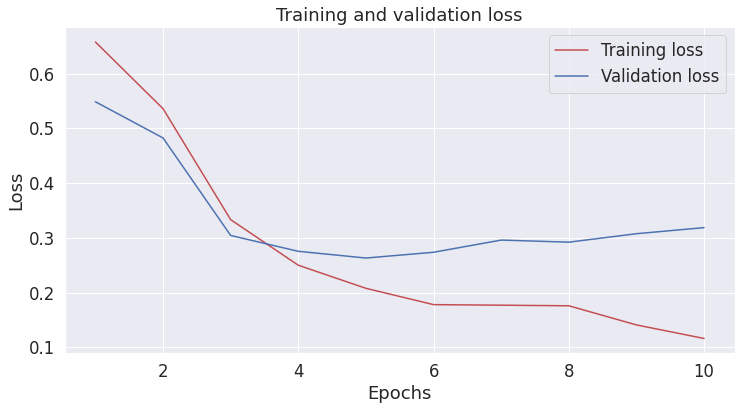

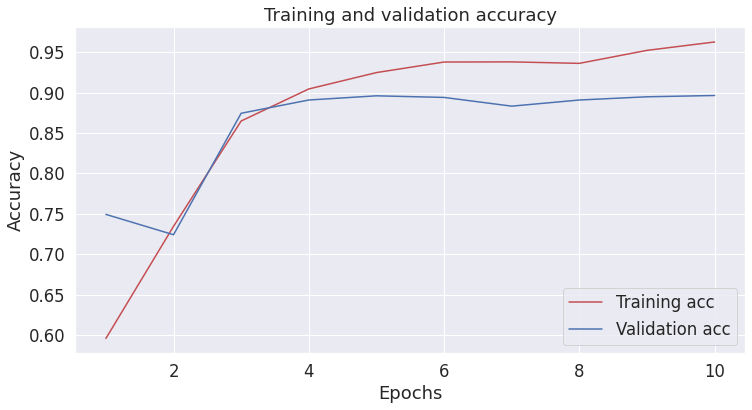

              precision    recall  f1-score   support

           0      0.872     0.890     0.881     12500
           1      0.887     0.869     0.878     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 25s 123ms/step - loss: 0.6542 - accuracy: 0.5762 - val_loss: 0.3248 - val_accuracy: 0.8668
Epoch 2/100
176/176 [==============================] - 21s 120ms/step - loss: 0.3324 - accuracy: 0.8693 - val_loss: 0.2816 - val_accuracy: 0.8920
Epoch 3/100
176/176 [==============================] - 21s 119ms/step - loss: 0.2380 - accuracy: 0.9134 - val_loss: 0.2808 - val_accuracy: 0.8900
Epoch 4/100
176/176 [==============================] - 21s 119ms/step - loss: 0.1990 - accuracy: 0.9301 - val_loss: 0.2909 - val_accuracy: 0.8888
Epoch 5/100
176/176 [==============================] - 21s 119ms/step 

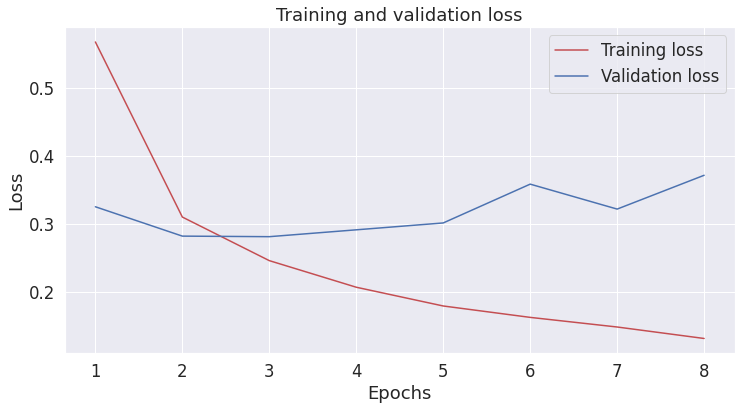

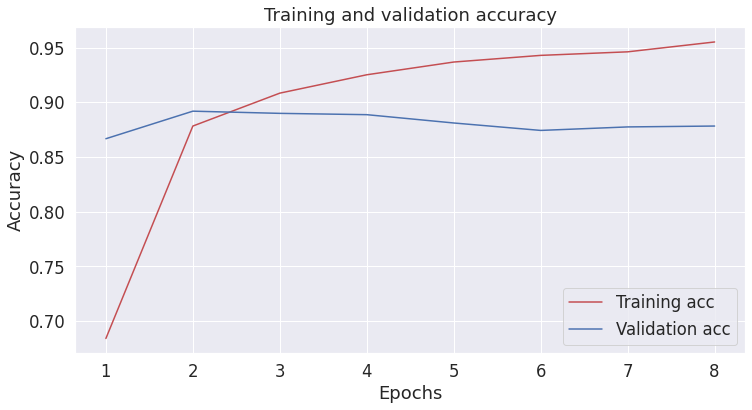

              precision    recall  f1-score   support

           0      0.860     0.905     0.882     12500
           1      0.900     0.852     0.876     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


Average accuracy: 0.8798 (+/- 0.0039)
Average loss: 0.2892 (+/- 0.0105)
Average F1: 0.8795 (+/- 0.0044)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):
  
  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  inputs = Input(shape=(None,), dtype="int32")
  embeddings = Embedding(input_dim=input_dim, output_dim=output_dim)(inputs)
  bilstm = Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True))(embeddings)
  attention_layer = Attention()([bilstm, bilstm])
  pooling_out1 = GlobalMaxPooling1D()(bilstm)
  pooling_out2 = GlobalMaxPooling1D()(attention_layer)
  merge = Concatenate()([pooling_out1, pooling_out2])
  mlp_hidden_out = Dense(units=64, activation="relu")(merge)
  mlp_hidden_out = Dropout(rate=0.5)(mlp_hidden_out)
  outputs = Dense(units=1, activation="sigmoid")(mlp_hidden_out)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
